In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the CAC40 components
page = requests.get("https://en.wikipedia.org/wiki/DAX")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='constituents',class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Logo,Company,Prime Standard Sector,Ticker,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Apparel,ADS.DE,2.0,"061,401 (2021)",1924
1,NaN,Airbus,Aerospace & Defence,AIR.DE,6.0,126.495 (2021),1970
2,NaN,Allianz,Financial Services,ALV.DE,7.1,"155,411 (2021)",1890
3,NaN,BASF,Chemicals,BAS.DE,3.5,"111,047 (2021)",1865
4,NaN,Bayer,Pharmaceuticals,BAYN.DE,4.8,"099,637 (2021)",1863
5,NaN,Beiersdorf,Consumer goods,BEI.DE,0.9,"020,567 (2021)",1882
6,NaN,BMW,Automotive,BMW.DE,2.5,"118,909 (2021)",1916
7,NaN,Brenntag,Distribution,BNR.DE,0.9,"017,200 (2021)",1874
8,NaN,Commerzbank,Financial Services,CBK.DE,0.8,"040,181 (2021)",1870
9,NaN,Continental,Automotive,CON.DE,0.6,"190,875 (2021)",1871


In [4]:
# Get the data for the stock ^FCHI
dax40_list = wiki['Ticker'].tolist()
dax40_list.append('^GDAXI')

In [5]:
# Save all the historical data
for stock in tqdm(dax40_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/41 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:18<00:00,  2.25it/s]


In [6]:
# Configuration of different parameters of the notebook
ticker = '^GDAXI'
year = '2024'

In [7]:
# Check DataFrame
stock_dax = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_dax.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0
1988-01-08,1026.689941,1026.689941,1026.689941,1026.689941,1026.689941,0
1988-01-11,987.520020,987.520020,987.520020,987.520020,987.520020,0
1988-01-12,986.890015,986.890015,986.890015,986.890015,986.890015,0
1988-01-13,965.770020,965.770020,965.770020,965.770020,965.770020,0


In [8]:
# Check DataFrame tail
stock_dax.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-26,17396.740234,17460.529297,17396.400391,17423.230469,17423.230469,53156400
2024-02-27,17431.369141,17563.410156,17428.169922,17556.490234,17556.490234,59725400
2024-02-28,17569.609375,17605.609375,17552.980469,17601.220703,17601.220703,56644500
2024-02-29,17634.609375,17742.480469,17620.109375,17678.189453,17678.189453,102738500
2024-03-01,17793.470703,17816.519531,17690.890625,17735.070312,17735.070312,85782600
2024-03-04,17743.439453,17756.390625,17684.730469,17716.169922,17716.169922,1220700
2024-03-05,17682.779297,17746.570312,17643.109375,17698.400391,17698.400391,74178400
2024-03-06,17685.919922,17745.160156,17682.509766,17716.710938,17716.710938,91487700
2024-03-07,17648.890625,17879.109375,17619.400391,17842.849609,17842.849609,86702800


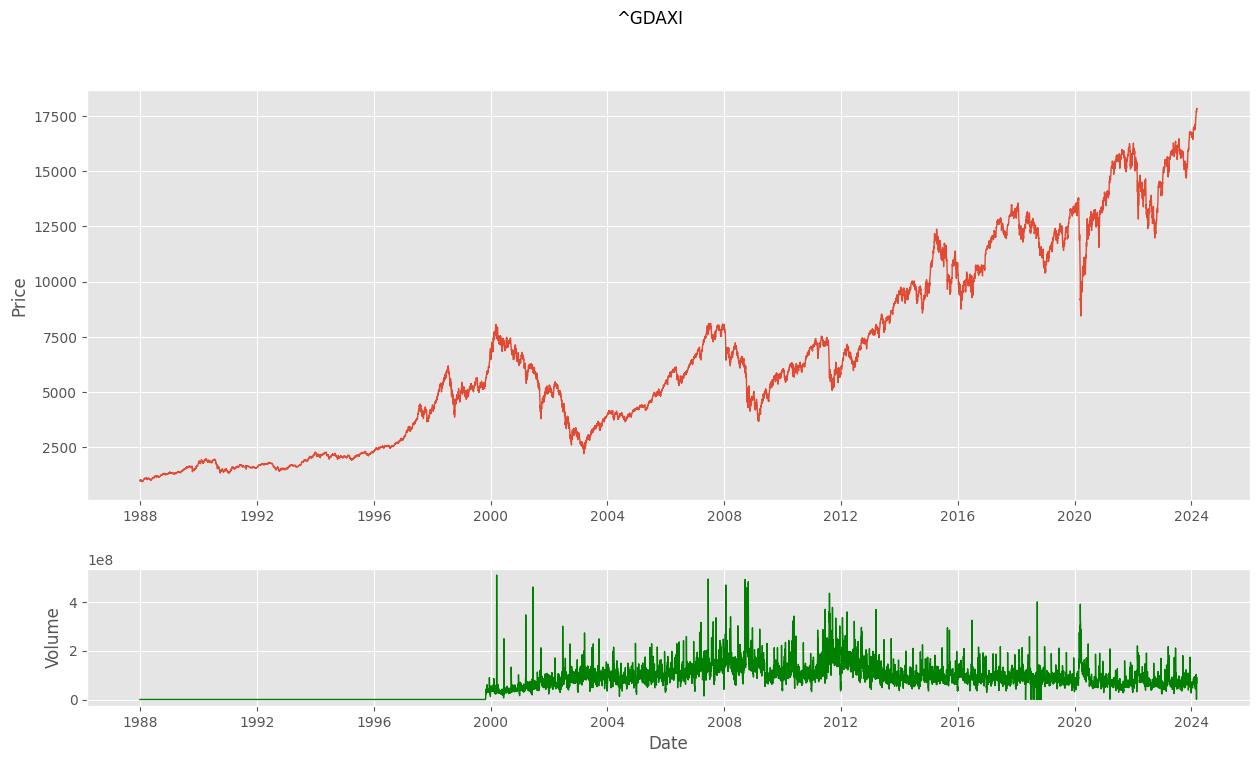

In [9]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_dax['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_dax['Volume'],linewidth=1,color='g')

plt.show()

In [10]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_dax.index,y=stock_dax['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_dax.index,y=stock_dax['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [11]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_dax['MMA20'] = stock_dax['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_dax["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_dax['BB_Upper'] = indicator_bb.bollinger_hband()
stock_dax['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_dax["Adj Close"].loc[year], window=14)

# RSI
stock_dax['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_dax['Daily_Return'] = daily_return(stock_dax["Adj Close"].loc[year])

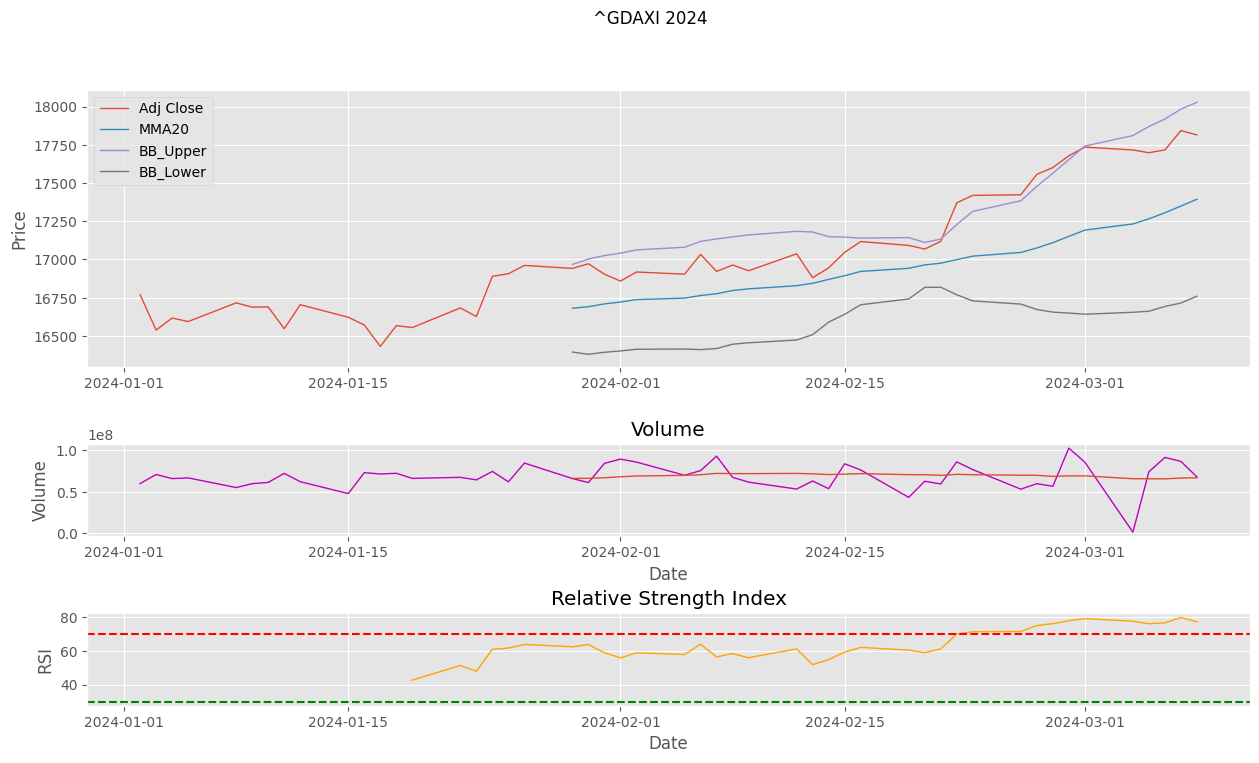

In [12]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_dax['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_dax['MMA20'],linewidth=1) 
axs[0].plot(stock_dax['BB_Upper'],linewidth=1)
axs[0].plot(stock_dax['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_dax['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_dax['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_dax['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [13]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_dax['Adj Close'].loc[year].index,y=stock_dax['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_dax['BB_Lower'].loc[year].index,y=stock_dax['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_dax['BB_Upper'].loc[year].index,y=stock_dax['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_dax['MMA20'].loc[year].index,y=stock_dax['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_dax['Volume'].loc[year].index,y=stock_dax['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_dax['Volume'].loc[year].index,y=stock_dax['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_dax['RSI'].loc[year].index,y=stock_dax['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [14]:
stock_dax.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-02-26,17396.740234,17460.529297,17396.400391,17423.230469,17423.230469,53156400,17046.127441,17384.069314,16708.185569,71.376835,0.022391
2024-02-27,17431.369141,17563.410156,17428.169922,17556.490234,17556.490234,59725400,17075.334961,17477.575569,16673.094353,74.939170,0.764840
2024-02-28,17569.609375,17605.609375,17552.980469,17601.220703,17601.220703,56644500,17110.208008,17564.472845,16655.943171,76.018092,0.254780
2024-02-29,17634.609375,17742.480469,17620.109375,17678.189453,17678.189453,102738500,17151.165527,17652.713018,16649.618037,77.789991,0.437292
2024-03-01,17793.470703,17816.519531,17690.890625,17735.070312,17735.070312,85782600,17192.008496,17741.747238,16642.269754,79.023452,0.321757
2024-03-04,17743.439453,17756.390625,17684.730469,17716.169922,17716.169922,1220700,17232.613965,17810.527197,16654.700733,77.483611,-0.106571
2024-03-05,17682.779297,17746.570312,17643.109375,17698.400391,17698.400391,74178400,17265.871973,17870.024888,16661.719057,75.984496,-0.100301
2024-03-06,17685.919922,17745.160156,17682.509766,17716.710938,17716.710938,91487700,17305.609473,17918.537416,16692.681529,76.489275,0.103459
2024-03-07,17648.890625,17879.109375,17619.400391,17842.849609,17842.849609,86702800,17349.560449,17983.844828,16715.276071,79.660842,0.711976


  0%|          | 0/41 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:00<00:00, 44.51it/s]


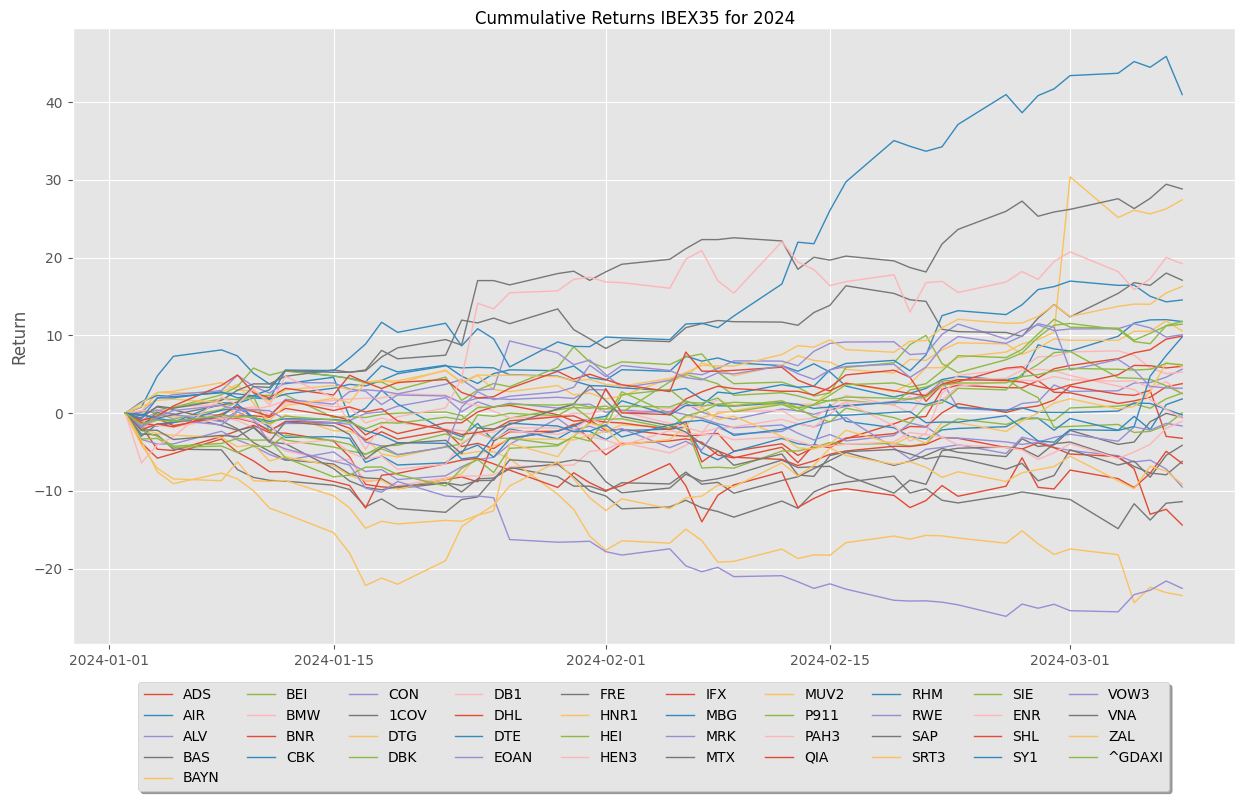

In [15]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(dax40_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [17]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(dax40_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/41 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:01<00:00, 40.83it/s]


In [18]:
# Create also table of cummulative returns
list = []

for stock in tqdm(dax40_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


100%|██████████| 41/41 [00:00<00:00, 50.21it/s]


,Ticker,Company,Date,Cummulative_Return
0,RHM.DE,Rheinmetall,2024-03-08,40.975926
1,SAP.DE,SAP,2024-03-08,28.833557
2,DTG.DE,Daimler Truck,2024-03-08,27.440091
3,ENR.DE,Siemens Energy,2024-03-08,19.225913
4,MTX.DE,MTU Aero Engines,2024-03-08,17.098175
5,MUV2.DE,Munich Re,2024-03-08,16.304925
6,MBG.DE,Mercedes-Benz Group,2024-03-08,14.558662
7,HEI.DE,Heidelberg Materials,2024-03-08,11.789526
8,AIR.DE,Airbus,2024-03-08,11.787183
9,SIE.DE,Siemens,2024-03-08,11.448321
